In [1]:
using NLsolve, Plots, LaTeXStrings

In [2]:
function kinetic_model!(F, u, p)
    cA, cB, cC, cD, cE, cF, cG = u
    k1, k2, k3, k4, k5, k6 = p
    F[1] = - k1*cA - k4*cA - k5*cA*cE
    F[2] = k1*cA - k2*cB - k3*cB
    F[3] = k2*cB - k4*cC
    F[4] = k4*cA - k3*cD
    F[5] = k3*cB - k5*cA*cE
    F[6] = k5*cA*cE - k6*cF*cG^2
    F[7] = - k6*cF*cG^2
end;

u0 = 0.1*ones(7)
lb=0.0; up=1.0
p = [0.3, 0.1, 0.1, 0.4, 0.02, 0.5];

function bifurcation(idx; p=p, u0=u0, lb=lb, up=up, it=500)
    ks = range(lb, up, it)
    uk = zeros(length(ks), length(u0))
    for (i, kᵢ) in enumerate(ks)
        p[idx] = kᵢ
        results = nlsolve((F, u)->kinetic_model!(F, u, p), u0)
        uk[i, :] = results.zero
    end
    Dict("croots"=>uk, "ks"=>ks)
end;

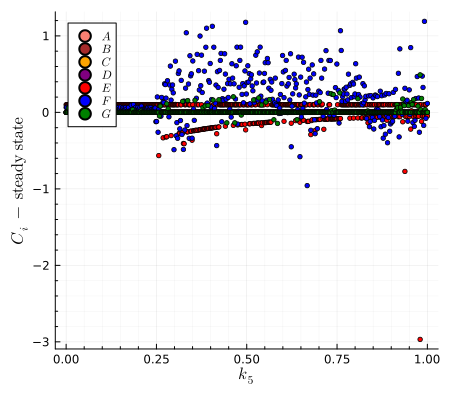

In [3]:
bif_dct = bifurcation(5)
labels = [L"A" L"B" L"C" L"D" L"E" L"F" L"G"]
colors = [:salmon :brown :orange :purple :red :blue :green]
scatter(bif_dct["ks"], bif_dct["croots"], label=labels,
        color=colors, leg=:topleft, markersize=2.5)
plot!(xlabel=L"$k_5$", ylabel=L"$C_{i}\,-\,\mathrm{steady\,\,state}$",
      minorgrid=true, size=(450,400))

***